In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib
from imblearn.over_sampling import RandomOverSampler

In [3]:
df = pd.read_csv("data/training_data.csv", index_col=False)

df = pd.get_dummies(df, columns=['Position', ], dtype=int)


df.head()

,Drafted,Rating,Total Points Per Game,Total Points,Total Touchdowns,Total 1st downs,Rushing 1st downs,Passing 1st downs,1st downs by penalty,3rd down %,...,Position_LS,Position_OC,Position_OG,Position_OL,Position_OT,Position_P,Position_QB,Position_RB,Position_TE,Position_WR
0,1,1.0000,40.0,520.0,66.0,284.0,143.0,120.0,21.0,43.17,...,0,0,0,0,0,0,0,0,0,0
1,1,1.0000,32.3,388.0,49.0,317.0,137.0,161.0,19.0,45.69,...,0,0,0,0,0,0,0,0,0,0
2,1,1.0000,29.9,389.0,53.0,248.0,146.0,90.0,12.0,43.09,...,0,0,0,0,0,0,0,0,0,0
3,1,0.9999,44.3,664.0,90.0,357.0,158.0,180.0,19.0,46.04,...,0,0,0,0,0,0,1,0,0,0
4,1,0.9999,29.4,382.0,51.0,247.0,108.0,122.0,17.0,37.21,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.columns

Index(['Drafted', 'Rating', 'Total Points Per Game', 'Total Points',
       'Total Touchdowns', 'Total 1st downs', 'Rushing 1st downs',
       'Passing 1st downs', '1st downs by penalty', '3rd down %', '4th down %',
       'Net Passing Yards', 'Yards Per Pass Attempt',
       'Net Passing Yards Per Game', 'Passing Touchdowns', 'Interceptions',
       'Rushing Attempts', 'Rushing Yards', 'Yards Per Rush Attempt',
       'Rushing Yards Per Game', 'Rushing Touchdowns', 'Total Offensive Plays',
       'Total Yards', 'Yards Per Game', 'Average Kickoff Return Yards',
       'Average Interception Yards', 'Net Average Punt Yards', 'Position_DB',
       'Position_DE', 'Position_DL', 'Position_DT', 'Position_EDGE',
       'Position_K', 'Position_LB', 'Position_LS', 'Position_OC',
       'Position_OG', 'Position_OL', 'Position_OT', 'Position_P',
       'Position_QB', 'Position_RB', 'Position_TE', 'Position_WR'],
      dtype='object')

In [5]:
#selecting 75% of data for training data
train_df = df.sample(frac = 0.75, random_state = 4)

#drops training data from the original dataframe, the other 25% is validation/test data
test_df = df.drop(train_df.index)

In [6]:
#scaling our data bc NNs perform better on data in same range
# calling to the (0,1) range
max_val = train_df.max(axis = 0)
min_val = train_df.min(axis = 0)

our_range = max_val - min_val
train_df = (train_df - min_val) / our_range
test_df = (test_df - min_val) / our_range

In [7]:
# Our model is looking for targets and labels so we need to separate our data into such categories
# In this case, we want points scored to be the target (output) and rest of columns are labels (inputs for model)
y_train = train_df['Drafted'] #target
y_test = test_df['Drafted']

X_train = train_df.drop('Drafted', axis = 1) #labels
X_test = test_df.drop('Drafted', axis = 1)

# Oversample to bring drafted samples equal to undrafted samples
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_train, y_train = oversampler.fit_resample(X_train, y_train)

#format the features/inputs as an arugment for model by shaping it accordingly
input_shape = [X_train.shape[1]]
input_shape

[43]

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 64, activation = 'tanh', input_shape = input_shape, ),
    tf.keras.layers.Dropout(0.20),
    tf.keras.layers.Dense(units = 64, activation = 'relu'),
    tf.keras.layers.Dropout(0.20),
    tf.keras.layers.Dense(1)
])

model.summary()

c:\Users\SidRo\anaconda3\envs\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,041 (27.50 KB)

 Trainable params: 7,041 (27.50 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(
    # Optimizer
    optimizer=tf.keras.optimizers.Adam(),
    # Loss function to minimize
    loss=tf.keras.losses.MeanSquaredError(reduction="sum_over_batch_size"),
)

In [10]:
losses = model.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size = 256, epochs = 50)

Epoch 1/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2892 - val_loss: 0.1497
Epoch 2/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2187 - val_loss: 0.1789
Epoch 3/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2135 - val_loss: 0.1722
Epoch 4/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2086 - val_loss: 0.1655
Epoch 5/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2083 - val_loss: 0.1847
Epoch 6/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2080 - val_loss: 0.2206
Epoch 7/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2053 - val_loss: 0.1824
Epoch 8/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2039 - val_loss: 0.1673
Epoch 9/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2031 - val_loss: 0.1792
Epoch 10/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2021 - val_loss: 0.2073
Epoch 11/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2029 - val_loss: 0.1623
Epoch 12/50
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [11]:
# let's say we want to pass the first 3 rows of features of our data to make predictions
# [0:3] indicates first 3 rows, : indicates all of the columns
model.predict(X_test.iloc[:10, :])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


array([[0.9619894 ],
       [0.86813307],
       [1.0266678 ],
       [0.78215563],
       [0.9530983 ],
       [0.9521924 ],
       [0.9673954 ],
       [0.86796224],
       [0.9063984 ],
       [0.9128363 ]], dtype=float32)

In [12]:
# we can compare it with what we actually have
y_test.iloc[:10]

2     1.0
13    1.0
15    1.0
21    1.0
27    1.0
31    1.0
39    1.0
44    1.0
46    1.0
47    1.0
Name: Drafted, dtype: float64

<Axes: >

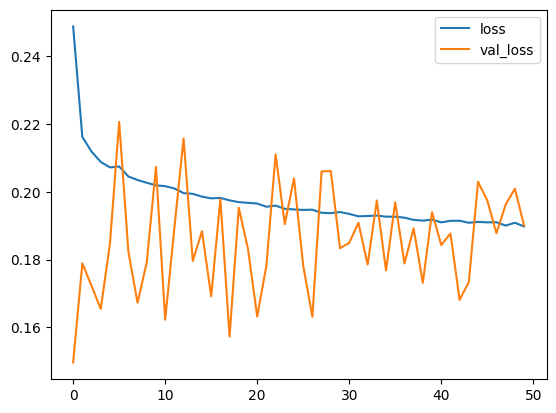

In [13]:
# we can analyze our training vs validation loss to see if our model is overfitting the data

# to do this, we will create a dataframe of all of our losses
# .history store the training loss and validation in each epoch
loss_df = pd.DataFrame(losses.history)

# plot this loss to visualize our model training
loss_df.loc[:, ['loss', 'val_loss']].plot()

In [14]:
# Run model on this years recruits and teams

testing_data = pd.read_csv("data/testing_data.csv", index_col=False)
college_stats = pd.read_csv("data/college_2024_data.csv", index_col=False)


clean_testing_data = pd.get_dummies(testing_data, columns=['Position', ], dtype=int)
clean_testing_data = clean_testing_data.drop(columns=["Name", "College Name"])


clean_testing_data = (clean_testing_data - min_val) / our_range
clean_testing_data = clean_testing_data.drop(columns=["Drafted"])

clean_testing_data = clean_testing_data.fillna(0.0)

clean_testing_data.head()

score = model.predict(clean_testing_data)


results = testing_data
results['Score'] = score
results = results[["Name", "Position", "Rating", "College Name", "Score"]]


def top_three_rows(group):
    return group.nlargest(3, 'Score')

top_three_rows_per_player = results.groupby('Name', group_keys=False).apply(top_three_rows)

# top_three_rows_per_player = top_three_rows_per_player.sort_values(by=["Position"], ascending=False)

top_three_rows_per_player
top_three_rows_per_player.to_csv("data/results.csv", index=False)
    

5072/5072 ━━━━━━━━━━━━━━━━━━━━ 4s 795us/step


C:\Users\SidRo\AppData\Local\Temp\ipykernel_17340\2134349924.py:29: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_three_rows_per_player = results.groupby('Name', group_keys=False).apply(top_three_rows)
